# 0. 기본 정보
- 코드 작성자: 여서연
- 코드 작성일: 2024-09-16 ~ 2024-09-18
- 데이터 분석 목적: 데이터 상태 파악
- 데이터 출처: [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

## 라이브러리 및 기초 설정

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 데이터 세부 정보 확인

컬럼 설명
---
- adult(bool): 성인 영화 여부
- belongs_to_collection(json): 컬렉션 정보
- budget(int): 제작 예산
- genres(json): 장르 정보
- homepage(str): 공식 홈페이지 주소
<br></br>
- id(int): id
- imdb_id(str): IMDB 사용 id
- original_language(str): 원어 코드
- original_title(str): 원제
- overview(str): 줄거리 또는 요약 정보
<br></br>
- popularity(float): 인기도 점수
- poster_path(str): 포스터 이미지 경로
- production_companies(json): 제작사
- production_countries(json): 제작 국가
- release_date(YY-MM-DD): 개봉일
<br></br>
- revenue(int): 총 수익
- runtime(int): 상영 시간(분)
- spoken_languages(json): 사용 언어
- status(str): 상태
- tagline(str): 태그라인 (짧은 홍보 문구)
<br></br>
- title(str): 제목
- video(bool): 관련 클립 존재 여부
- vote_average(float): 사용자 평점 평균
- vote_count(int): 사용자 평점 수

In [4]:
mvmd_origin = pd.read_csv('../data/movies_metadata.csv')

In [5]:
mvmd_origin.shape

(45466, 24)

In [6]:
mvmd_origin.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
38225,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,57130,tt0114044,en,One Survivor Remembers,Coproduced by the U.S.Holocaust Memorial Museu...,0.516589,/s48N9oRYVT7Tq9emF7UCIjnonpw.jpg,[],[],1996-06-19,0.0,39.0,[],Released,NaN,One Survivor Remembers,False,4.0,2.0
3558,False,"{'id': 157671, 'name': 'The Decline of Western...",0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",NaN,36724,tt0094980,en,The Decline of Western Civilization Part II: T...,An exploration of the heavy metal scene in Los...,1.350703,/sDZ0bgMfoJbbhbiLj1nooDBWn1k.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1988-06-17,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's more than music...it's a way of life.,The Decline of Western Civilization Part II: T...,False,6.8,20.0
33806,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,50210,tt1814819,ko,파괴된 사나이,"One day, Hye Lin, the five-year old daughter o...",1.057285,/ejQ1XzBf0dDcdUag4CuWztm3FNZ.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2010-07-01,0.0,113.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Man of Vendetta,False,6.0,12.0
30035,False,NaN,0,[],NaN,63717,tt0494239,fr,Jardins en automne,When he loses his position as a powerful gover...,0.229323,/uOjxcutNvMIGh8FYRRvHBI8f6pV.jpg,"[{'name': 'Pierre Grise Productions', 'id': 27...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2006-09-06,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Gardens in Autumn,False,5.9,6.0
5656,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,14626,tt0209933,fr,Beau Travail,"Foreign Legion officer, Galoup, recalls his on...",2.336209,/yVEWdkztcxgWD0JxuH2U1KLXUya.jpg,"[{'name': 'La Sept-Arte', 'id': 11332}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2000-05-03,0.0,90.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Beau Travail,False,7.2,35.0
36062,False,NaN,0,[],NaN,377136,tt1048097,en,Liquidation,"The year is 1946. World War II is over, but it...",0.132189,/cRNJ4FEvcF86oZDzORZ3p2f3lEO.jpg,[],[],2007-01-10,0.0,644.0,[],Released,The meeting place is Odessa,Liquidation,False,7.3,3.0
43104,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",http://www.youshouldmeetmyson.com/You_Should_M...,73541,tt1615916,en,You Should Meet My Son!,A comedy about a conservative Southern mom who...,0.573313,/l6AwmxjLsk1sHDnpMqIJaHWQp4J.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-10-31,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"'He's a Catch!""",You Should Meet My Son,False,5.9,10.0
44962,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,32228,tt0386907,en,5ive Days to Midnight,A physicist discovers a briefcase containing p...,1.05306,/2WDgSHRp7UObXuWW8DB8ZaAugBb.jpg,[],"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2004-01-01,0.0,210.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,5ive Days to Midnight,False,6.8,18.0
25065,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,101135,tt0097104,en,A Connecticut Yankee in King Arthur's Court,"After a horse accident, Karen wakes up to find...",0.764068,/co5qGMktwEZiUYdAFjYoXOkD2Dv.jpg,"[{'name': 'Schaefer/Karpf Productions', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1989-12-18,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Connecticut Yankee in King Arthur's Court,False,6.0,3.0
18994,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,94363,tt1205558,en,Hick,A pistol-packing teen meets an unstable rebel ...,6.21609,/pTz9ShhcJfZgT364UmwUKJ9EBaL.jpg,"[{'name': 'Stone River Productions', 'id': 903...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-09-10,0.0

In [7]:
mvmd_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
# 변수 타입
data_types = mvmd_origin.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video']

양적 변수: ['revenue', 'runtime', 'vote_average', 'vote_count']


In [9]:
# 숫자로 변환할 수 없는 값 확인
for col in ['budget','id','popularity']:
    invalid_values = mvmd_origin[pd.to_numeric(mvmd_origin[col], errors='coerce').isna()]
    print(f'[{col}]\n{invalid_values[col]}\n')

[budget]
19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

[id]
19730    1997-08-20
29503    2012-09-29
35587    2014-01-01
Name: id, dtype: object

[popularity]
19729                      NaN
19730                      NaN
29502                      NaN
29503                      NaN
35586                      NaN
35587    Beware Of Frost Bites
Name: popularity, dtype: object



In [10]:
mvmd_origin.iloc[[19730,29503,35587]]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**논의 사항 1**
---
- `budget`, `id`: 문제의 행 삭제
- `popularity`: 결측치 보간

In [11]:
mvmd = mvmd_origin.drop([19730, 29503, 35587])
mvmd = mvmd.reset_index(drop=True)
mvmd.iloc[19729:19732]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,False,NaN,21000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://silverliningsplaybookmovie.com/,82693,tt1045658,en,Silver Linings Playbook,After spending eight months in a mental instit...,14.488111,/ilrZAV2klTB0FLxLb01bOp5pzD9.jpg,"[{'name': 'The Weinstein Company', 'id': 308}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-08,205738714.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Watch For The Signs,Silver Linings Playbook,False,7.0,4840.0
19731,False,NaN,31000000,"[{'id': 18, 'name': 'Drama'}]",http://www.paramount.com/flight,87502,tt1907668,en,Flight,Commercial airline pilot Whip Whitaker has a p...,10.973822,/8XEbkjgorAm9xk15mF63jqJ4ByV.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-11-02,161772375.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Flight,False,6.5,2449.0


In [12]:
mvmd.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


# 1. 결측치

In [13]:
mvmd.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

**논의 사항 2**
---
- 3개씩 있는 컬럼은 마음 편하게 해당 행 삭제?

In [14]:
# 결측치가 3개인 컬럼 찾기
missing_3_cols = mvmd.isnull().sum()[mvmd.isnull().sum() == 3].index

# 각 컬럼에서 결측치의 위치(인덱스) 출력
for col in missing_3_cols:
    missing_indices = mvmd[mvmd[col].isnull()].index
    print(f"Column: {col}")
    print(f"Missing at indices: {list(missing_indices)}\n")

Column: popularity
Missing at indices: [19729, 29501, 35584]

Column: production_companies
Missing at indices: [19729, 29501, 35584]

Column: production_countries
Missing at indices: [19729, 29501, 35584]

Column: revenue
Missing at indices: [19729, 29501, 35584]

Column: spoken_languages
Missing at indices: [19729, 29501, 35584]

Column: title
Missing at indices: [19729, 29501, 35584]

Column: video
Missing at indices: [19729, 29501, 35584]

Column: vote_average
Missing at indices: [19729, 29501, 35584]

Column: vote_count
Missing at indices: [19729, 29501, 35584]



In [15]:
mvmd.iloc[[19729,29501,35584]]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35584,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mvmd_cleaned = mvmd.drop([19729,29501,35584])
mvmd_cleaned = mvmd_cleaned.reset_index(drop=True)
mvmd_cleaned.iloc[19728:19731]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19728,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,27058,tt0171227,en,Diplomatic Siege,When Steve Mitchell is clandestinely sent to t...,0.571035,/tLsQcikwkWKQiD7IHO0WIVe7m0Y.jpg,[],[],1999-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Diplomatic Siege,False,4.7,3.0
19729,False,NaN,21000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://silverliningsplaybookmovie.com/,82693,tt1045658,en,Silver Linings Playbook,After spending eight months in a mental instit...,14.488111,/ilrZAV2klTB0FLxLb01bOp5pzD9.jpg,"[{'name': 'The Weinstein Company', 'id': 308}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-08,205738714.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Watch For The Signs,Silver Linings Playbook,False,7.0,4840.0
19730,False,NaN,31000000,"[{'id': 18, 'name': 'Drama'}]",http://www.paramount.com/flight,87502,tt1907668,en,Flight,Commercial airline pilot Whip Whitaker has a p...,10.973822,/8XEbkjgorAm9xk15mF63jqJ4ByV.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-11-02,161772375.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Flight,False,6.5,2449.0


**논의 사항 3**
---
- json 형식 컬럼의 `[]`값은 결측치로 처리

In [17]:
for col in ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']:
    mvmd_cleaned[col] = mvmd_cleaned[col].replace('[]', np.nan)

## 분포 확인

In [18]:
# 숫자로 변환할 수 없는 값 확인
for col in ['budget','id','popularity']:
    invalid_values = mvmd_cleaned[pd.to_numeric(mvmd_cleaned[col], errors='coerce').isna()]
    print(f'[{col}]\n{invalid_values[col]}\n')

[budget]
Series([], Name: budget, dtype: object)

[id]
Series([], Name: id, dtype: object)

[popularity]
Series([], Name: popularity, dtype: object)



In [19]:
# 숫자형으로 변환
mvmd_cleaned['budget'] = pd.to_numeric(mvmd_cleaned['budget']).astype('int64')
mvmd_cleaned['id'] = pd.to_numeric(mvmd_cleaned['id']).astype('int64')
mvmd_cleaned['popularity'] = pd.to_numeric(mvmd_cleaned['popularity']).astype('int64')

In [20]:
# 변수 타입
data_types = mvmd_cleaned.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['adult', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video']

양적 변수: ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']


In [21]:
# string
for col in ['adult','original_language','status','video']:
    print(f'{mvmd_cleaned[col].value_counts()}\n')

adult
False    45451
True         9
Name: count, dtype: int64

original_language
en    32267
fr     2438
it     1529
ja     1349
de     1080
      ...  
ay        1
rw        1
cy        1
tg        1
si        1
Name: count, Length: 89, dtype: int64

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

video
False    45367
True        93
Name: count, dtype: int64



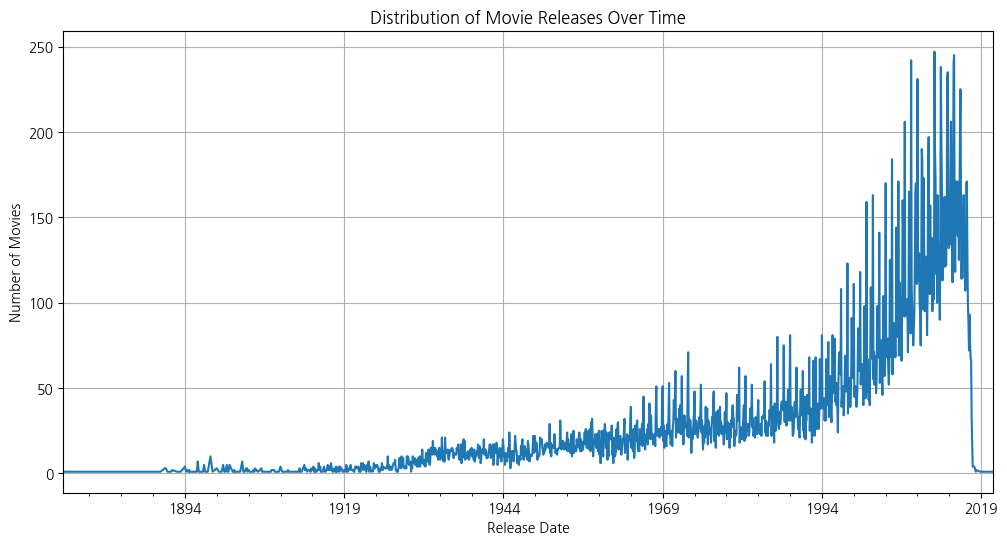

In [22]:
# 'release_date' 컬럼을 datetime 형식으로 변환
mvmd_cleaned['release_date'] = pd.to_datetime(mvmd_cleaned['release_date'])

# 개봉월 기준
release_date_counts = mvmd_cleaned['release_date'].dt.to_period('M').value_counts().sort_index()

# 시계열 데이터 분포를 시각화
plt.figure(figsize=(12, 6))
release_date_counts.plot(kind='line')
plt.title('Distribution of Movie Releases Over Time')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [23]:
target_cols = quant_vari
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  #제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  #가장 가까운 값을 사용하여 열 개수 계산

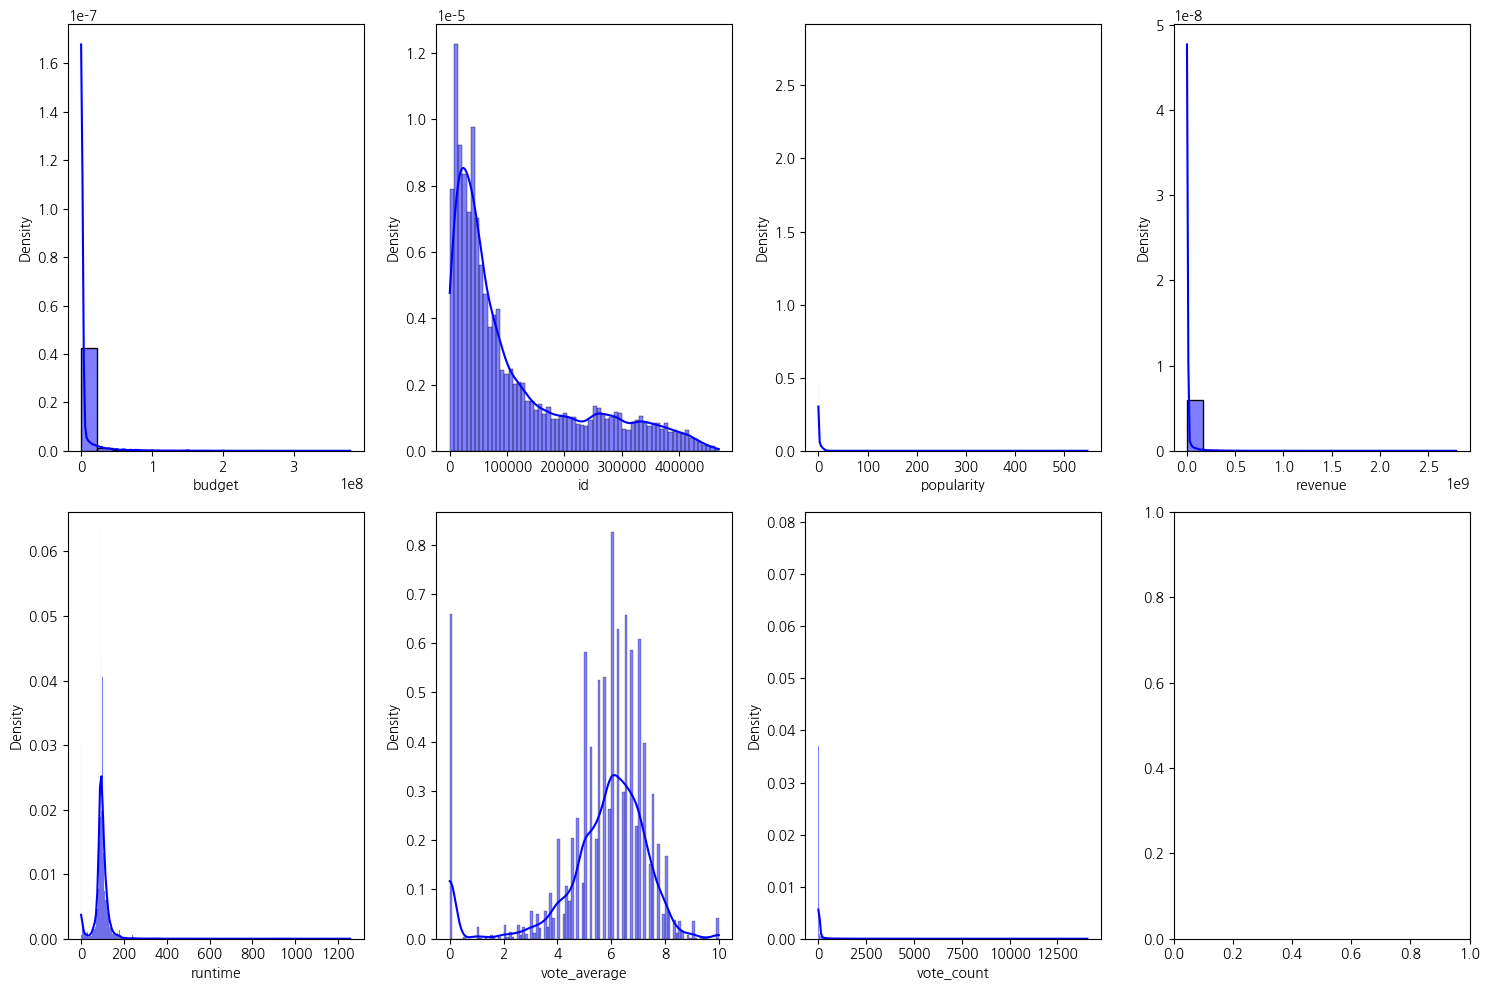

In [24]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(mvmd_cleaned[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [25]:
for col in quant_vari[:1] + quant_vari[2:]:
    mvmd_cleaned[col] = mvmd_cleaned[col].replace(0, np.nan)

In [26]:
mvmd_cleaned.isnull().mean() * 100

adult                     0.000000
belongs_to_collection    90.123185
budget                   80.444347
genres                    5.371755
homepage                 82.890453
id                        0.000000
imdb_id                   0.037396
original_language         0.024197
original_title            0.000000
overview                  2.098548
popularity               46.728993
poster_path               0.842499
production_companies     26.121865
production_countries     13.818742
release_date              0.184778
revenue                  83.704355
runtime                   3.992521
spoken_languages          8.422789
status                    0.178179
tagline                  55.098988
title                     0.000000
video                     0.000000
vote_average              6.594809
vote_count                6.377035
dtype: float64

**논의 사항 4**
---
- `belongs_to_collection`, `budget`, `homepage`, `popularity`, `revenue`, `tagline`: 결측치 비율이 40% 이상이므로 컬럼 삭제
- `vote_average`, `vote_count`: 결측치 비율 5% ~ 20%이므로 KNN?
- `genres`, `imdb_id`, `original_language`, `overview`, `poster_path`, `production_companies`, `production_countries`, `release_date`, `runtime`, `spoken_languages`, `status`: 최빈값? 행 삭제? 컬럼 삭제?

In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
mvmd_cleaned[['vote_average', 'vote_count']] = imputer.fit_transform(mvmd_cleaned[['vote_average', 'vote_count']])

일단 imdb_id, overview, poster_path를 버리겠습니다.

In [28]:
print(mvmd_cleaned['genres'][0])
print(mvmd_cleaned['production_companies'][0])
print(mvmd_cleaned['production_countries'][0])
print(mvmd_cleaned['spoken_languages'][0])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'name': 'Pixar Animation Studios', 'id': 3}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_639_1': 'en', 'name': 'English'}]


In [29]:
print(type(mvmd_cleaned['genres'][0]))
print(type(mvmd_cleaned['production_companies'][0]))
print(type(mvmd_cleaned['production_countries'][0]))
print(type(mvmd_cleaned['spoken_languages'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [30]:
# 특정 col의 json 형태 값을 원하는 val 값으로 저장
import json

def ExtractValues(col, val):
    for idx, row in mvmd_cleaned.iterrows():
        if pd.isna(row[col]):
            continue

        try:
            if row[col].count("{") == 1:
                cleaned = row[col].strip("[]")
                s = cleaned.replace("'",'"')
                json_dict = json.loads(s)
                mvmd_cleaned.at[idx, col] = json_dict[val]
            else:
                cleaned = row[col].strip("[]").rstrip("}").replace("'","")
                split1 = cleaned.replace("{","").split("}, ")
                result_dict = {}

                for item in split1:
                    split2 = item.split(", ")
                    for pair in split2:
                        key, value = pair.split(":")
                        key = key.strip('"').strip()
                        value = value.strip('"').strip()
                        if value.isdigit():
                            value = int(value)

                        if key not in result_dict:
                            result_dict[key] = []
                        result_dict[key].append(value)
                mvmd_cleaned.at[idx, col] = result_dict[val]
        except Exception as e:
            mvmd_cleaned.at[idx, col] = f"ERROR: {str(e)}"  #기타 예외 처리

In [31]:
ExtractValues('genres','name')
ExtractValues('production_companies','name')
ExtractValues('production_countries','iso_3166_1')
ExtractValues('spoken_languages','iso_639_1')

In [32]:
print(mvmd_cleaned['genres'][0])
print(mvmd_cleaned['production_companies'][0])
print(mvmd_cleaned['production_countries'][0])
print(mvmd_cleaned['spoken_languages'][0])

['Animation', 'Comedy', 'Family']
Pixar Animation Studios
US
en


In [33]:
for col in ['genres','original_language','production_companies','production_countries','release_date','runtime','spoken_languages','status']:
    mode_value = mvmd_cleaned[col].mode()[0]
    print(f'{col}의 최빈값: {mode_value}')
    mvmd_cleaned[col].fillna(mode_value, inplace=True)

genres의 최빈값: Drama
original_language의 최빈값: en
production_companies의 최빈값: Metro-Goldwyn-Mayer (MGM)
production_countries의 최빈값: US
release_date의 최빈값: 2008-01-01 00:00:00
runtime의 최빈값: 90.0
spoken_languages의 최빈값: en
status의 최빈값: Released


In [34]:
mvmd_selected = mvmd_cleaned.drop(columns=['belongs_to_collection','budget','homepage','imdb_id','overview','popularity','poster_path','revenue','tagline']).reset_index(drop=True)
mvmd_selected.sample(10)

,adult,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,video,vote_average,vote_count
5018,False,Western,121703,en,Cattle Queen of Montana,"[RKO Radio Pictures, Benedict Bogeaus Production]",US,1954-11-18,88.0,en,Released,Cattle Queen of Montana,False,4.300000,3.000000
35353,False,"[Crime, Drama]",149232,en,The Pardon,The Pardon Group,US,2013-03-22,109.0,en,Released,The Pardon,False,5.000000,3.000000
35302,False,Drama,131897,it,Ho fatto splash,Metro-Goldwyn-Mayer (MGM),US,1980-10-30,90.0,en,Released,I Made a Splash,False,6.700000,3.000000
42338,False,Drama,265432,de,Hunger auf Leben,Metro-Goldwyn-Mayer (MGM),DE,2004-06-18,90.0,de,Released,Hunger auf Leben,False,6.014877,117.382886
11988,False,Drama,6535,en,Talk to Me,"[The Mark Gordon Company, Pelagius Film]",US,2007-07-13,118.0,en,Released,Talk to Me,False,7.100000,36.000000
2714,False,"[Fantasy, Comedy]",37718,en,The Muse,October Films,US,1999-08-27,97.0,en,Released,The Muse,False,5.300000,31.000000
16456,False,"[Drama, Music, Romance]",43781,en,Orchestra Wives,Twentieth Century Fox Film Corporation,US,1942-09-04,98.0,en,Released,Orchestra Wives,False,5.100000,4.000000
21011,False,Documentary,176182,en,The Human Scale,Metro-Goldwyn-Mayer (MGM),DK,2013-02-20,83.0,en,Released,The Human Scale,False,5.400000,5.000000
8286,False,Drama,50034,en,Secret Honor,Sandcastle 5 Productions,US,1984-09-15,90.0,en,Released,Secret Honor,False,6.800000,9.000000
37103,False,Comedy,79836,it,Il giorno in più,Metro-Goldwyn-Mayer (MGM),IT,2011-12-02,90.0,it,Released,Il giorno in più,False,6.200000,24.000000


# 2. 이상치

In [35]:
mvmd_selected.describe()

,id,release_date,runtime,vote_average,vote_count
count,45460.00000,45460,45460.000000,45460.000000,45460.000000
mean,108357.07004,1992-05-26 06:19:26.951165824,97.189331,6.013403,117.382886
min,2.00000,1874-12-09 00:00:00,1.000000,0.500000,1.000000
25%,26448.50000,1978-10-29 12:00:00,87.000000,5.300000,4.000000
50%,59999.00000,2001-09-08 00:00:00,95.000000,6.014877,13.000000
75%,157324.00000,2010-12-11 00:00:00,107.000000,6.800000,57.000000
max,469172.00000,2020-12-16 00:00:00,1256.000000,10.000000,14075.000000
std,112462.43383,NaN,33.977496,1.214657,490.472449


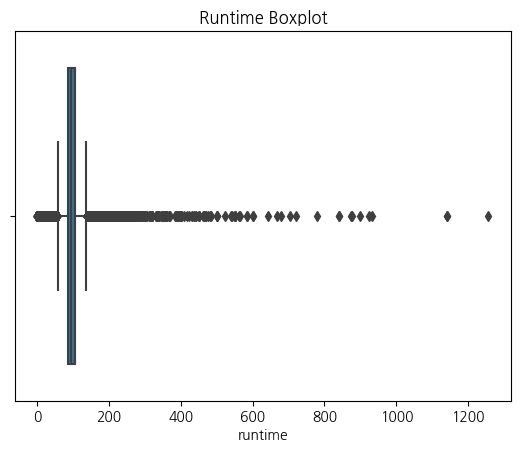

In [36]:
sns.boxplot(x=mvmd_selected['runtime'])
plt.title('Runtime Boxplot')
plt.show()

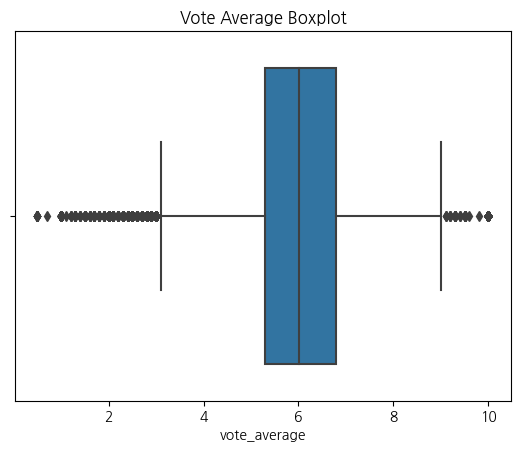

In [37]:
sns.boxplot(x=mvmd_selected['vote_average'])
plt.title('Vote Average Boxplot')
plt.show()

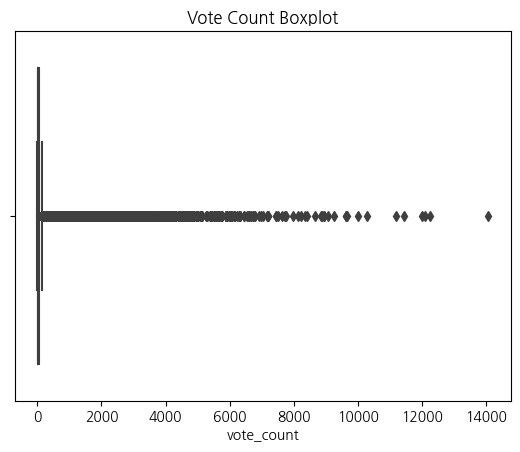

In [38]:
sns.boxplot(x=mvmd_selected['vote_count'])
plt.title('Vote Count Boxplot')
plt.show()

**논의 사항 5**
---
- 이상치를 정말 '이상치'라고 할 수 있는가?

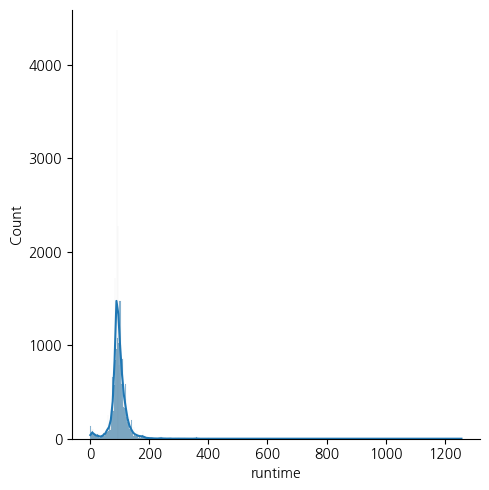

In [39]:
sns.displot(mvmd_selected['runtime'], kde=True)
plt.show()

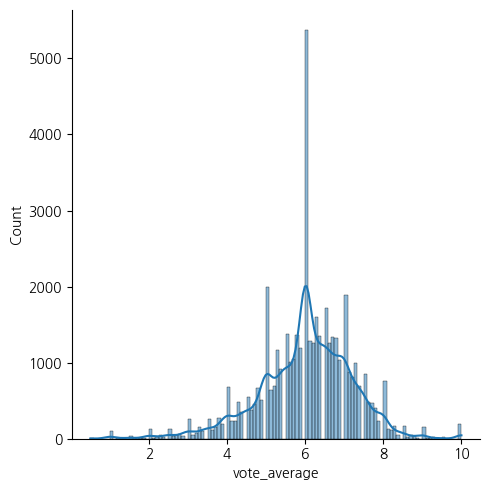

In [40]:
sns.displot(mvmd_selected['vote_average'], kde=True)
plt.show()

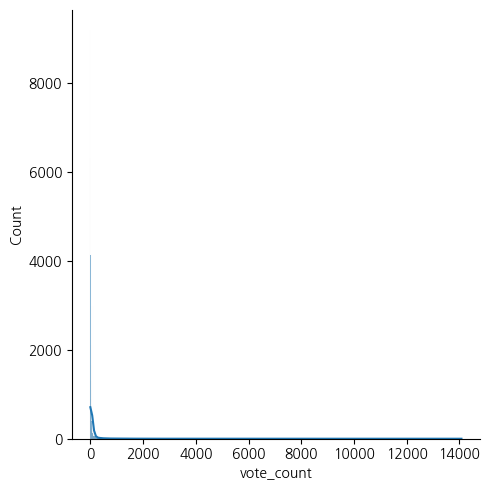

In [41]:
sns.displot(mvmd_selected['vote_count'], kde=True)
plt.show()